# SABAKAKI PETER Z MSC. BIOINFORMATICS
## GROUP ONE ASSIGNMENT

### 1.0 - LOADING THE NECCESARY LIBRARIES

In [74]:
# loading the necessary libraries
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import missingno as msno
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

#Ensemble
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from xgboost.sklearn import XGBRegressor




#let's remove the annoying warnings from our cells.
import warnings
warnings.filterwarnings('ignore')

### 2.0 - IMPORTING THE DATASETS

In [3]:
train = pd.read_csv("/home/kcca/Downloads/train.csv") # this is the training dataset
test = pd.read_csv("/home/kcca/Downloads/test.csv") # this is the test dataset

### 3.0 - EXPLANATORY DATA ANALYSIS

### 3.1 - Display the first 10 rows of the train dataset

In [4]:
## Display the first 10 r0ws of the train dataset
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


`The above table shows that the dataset contains unknown values. I should consider removing them from the dataset, since they do not contibute to the analysis`

### 3.2 - Checking the shape of the train dataset
- This out puts the number of rows and columns within the dataset

In [5]:
train.shape

(1460, 81)

`The above out put shows that the train dataset has 1460 rows and 81 columns`

### 3.3 - A plot showing the missing data matrix of the train dataset
- This shows the missing data patterns with in the database
- The sparkline on the right gives a summary of the general shape of the data completeness

Text(0.5, 1.0, 'A PLOT SHOWING THE MISSING DATA MATRIX')

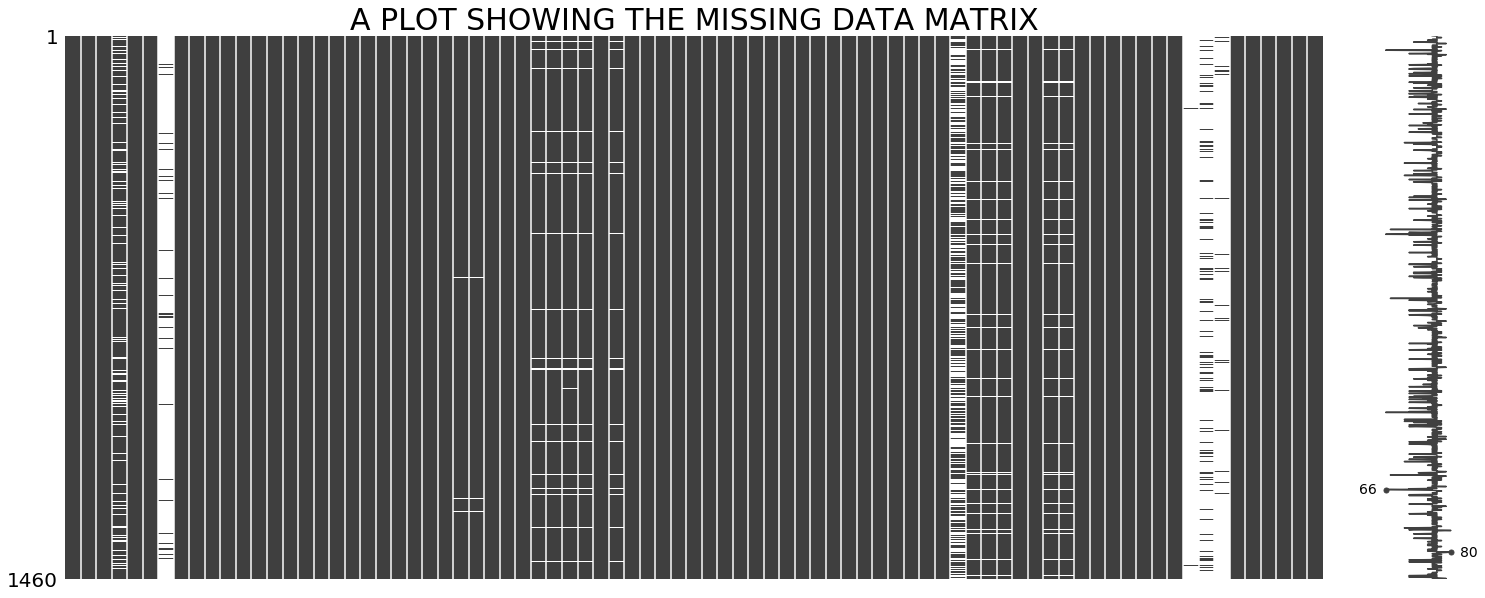

In [6]:
msno.matrix(train)
plt.title('A PLOT SHOWING THE MISSING DATA MATRIX', fontsize=30)


### 3.4 - A heatmap showing the nullity of the train dataset
- The range of this nullity correlation is from -1 to 1 (-1 ≤ R ≤ 1); the features with no missing value are excluded in the heatmap. If the nullity correlation is very close to zero (-0.05 < R < 0.05), no value will be displayed.
- A perfect positive nullity correlation (R=1) indicates when the first feature and the second feature both have corresponding missing values while a perfect negative nullity correlation (R=-1) means that one of the features is missing and the second is not missing.

Text(0.5, 1, 'A HEATMAP SHOWING A CORRELATION OF MISSING DATA BETWEEN ATTRIBUTES IN THE TRAIN DATASET')

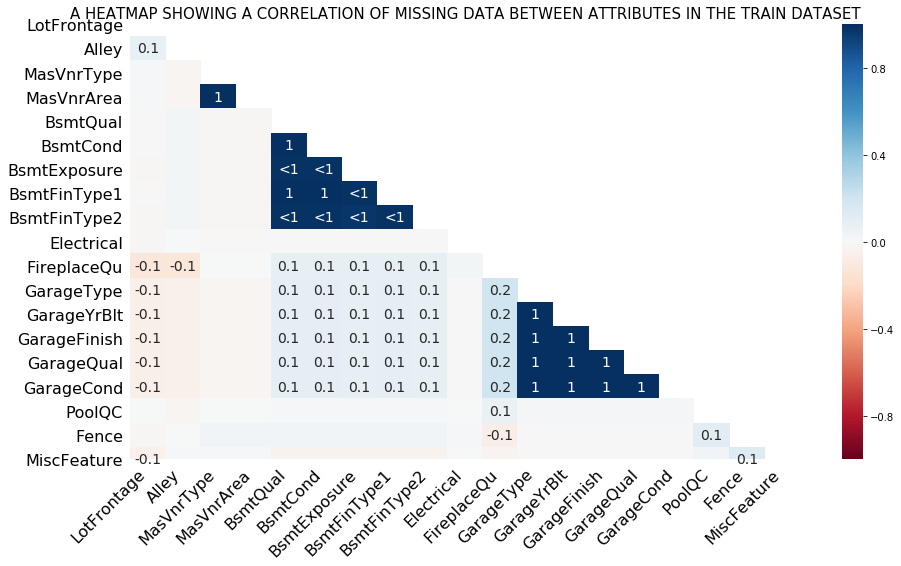

In [7]:
msno.heatmap(train,figsize=(15,8))
plt.title('A HEATMAP SHOWING A CORRELATION OF MISSING DATA BETWEEN ATTRIBUTES IN THE TRAIN DATASET', fontsize=15)


### 3.5 - Checking the number of missing values in the train dataset

In [8]:
train.isnull().sum() # this outputs the number of null / missing /unkown values in each column

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

`Since the above command can not list all columns for me to see which columns contain NaNs, then I am going to filter out only those columns with the NaNs and put them in a dataframe. By so doing, I will be able to see only those columns with NaNs. I will do so by using the following commands`

In [9]:
columns_with_NaNs = train.isnull().sum() #  first assign all the output into this object
columns_with_NaNs = columns_with_NaNs[columns_with_NaNs>0] # filter out only those greater than 0. this because zero means no NaNs and those greater than zero indicate the presence of NaNs
columns_with_NaNs = columns_with_NaNs.sort_values(ascending=False) # sort them in descending order
columns_with_NaNs = pd.DataFrame({"Columns With Unkown Values" :columns_with_NaNs})
columns_with_NaNs

,Columns With Unkown Values
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageType,81
GarageFinish,81
GarageQual,81


`from the above dataset, i can get to know the number of columns in the train dataset having NaNs, using the following command ` 

In [10]:
columns_with_NaNs.shape

(19, 1)

`there are 19 columns having unknown values`
###  Figure1: Visualising the percentage of  missing data per column using a histogram

Text(0.5, 1.0, 'Percent of null values per attribute')

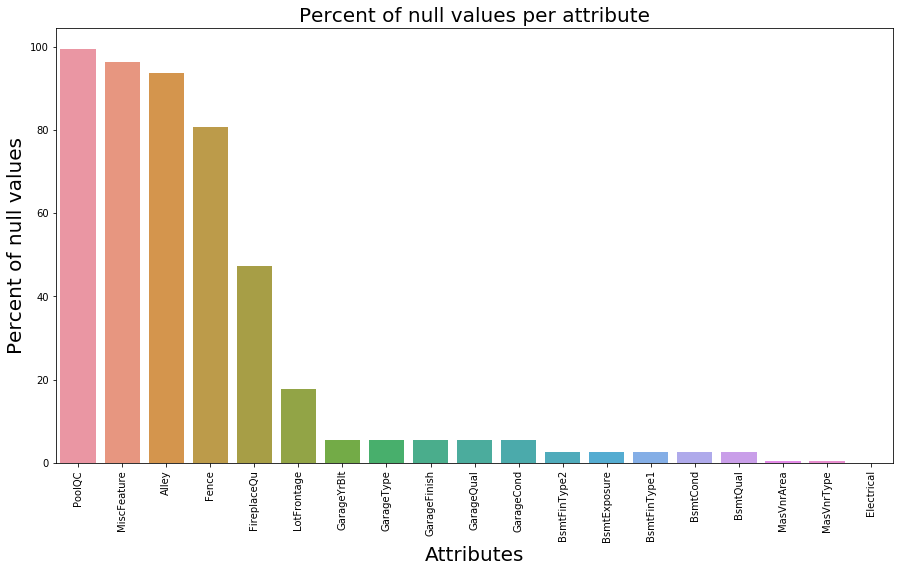

In [11]:
train_clone = train.copy() # this makes a clone of the train dataset and names it 'train_clone'

### Now i use the train_clone dataset to compute the percentage of unknown values in each column
columns_with_NaNs = train_clone.isnull().sum() #  first assign all the output into this object
columns_with_NaNs = columns_with_NaNs.drop(columns_with_NaNs[columns_with_NaNs==0].index) # filter out only those greater than 0. this because zero means no NaNs and those greater than zero indicate the presence of NaNs
columns_with_NaNs = columns_with_NaNs.sort_values(ascending=False) # sort them in descending order
columns_with_NaNs =  columns_with_NaNs / len(train_clone)*100

### Plot the percentages on a histogram
f, ax = plt.subplots(figsize=(15,8))
plt.xticks(rotation='90')
sns.barplot(x=columns_with_NaNs.index, y=columns_with_NaNs)
plt.xlabel('Attributes', fontsize=20)
plt.ylabel('Percent of null values', fontsize=20)
plt.title('Percent of null values per attribute', fontsize=20)



` From the above visualization, i am going to consider dropping colums having the biggest proportions of missing data, i.e PoolQC , MiscFeature, Alley and Fence`

### 3.4 - Dropping columns  with more missing data

In [12]:
# keep columns with atleast 690 missing values. that means it will only keep columns upto Fireplacequ 
train = pd.DataFrame(train.dropna(axis='columns', thresh=690))
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

`The above list shows that PoolQC , MiscFeature, Alley and Fence columns have been dropped`

### 3.5 - Dropping rows with missing values

In [14]:
train = train.dropna(axis=0)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,1448,60,RL,80.0,10000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,12,2007,WD,Normal,240000
1451,1452,20,RL,78.0,9262,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2009,New,Partial,287090
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000


### 3.5 - Data types of each column

In [15]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 77, dtype: object

### 3.6 - Descriptive statistics of the train dataset

In [16]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,...,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,725.248714,55.351630,75.958834,11549.427101,6.818182,5.511149,1978.120069,1989.219554,155.593482,526.857633,...,117.178388,58.161235,19.291595,3.543739,24.806175,5.643225,23.927959,6.483705,2007.723842,222759.428816
std,422.353423,36.939463,27.214024,10602.911784,1.296789,1.001440,29.811827,19.579247,229.145284,542.348158,...,131.310023,71.153274,61.941837,28.890320,70.771219,55.659800,197.356695,2.792231,1.322901,92364.180462
min,2.000000,20.000000,21.000000,1300.000000,3.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,62383.000000
25%,359.000000,20.000000,60.000000,8425.000000,6.000000,5.000000,1959.000000,1976.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,159975.000000
50%,703.000000,60.000000,75.000000,10261.000000,7.000000,5.000000,1990.000000,1997.000000,16.000000,442.000000,...,100.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,193500.000000
75%,1098.000000,60.000000,86.000000,12436.500000,8.000000,6.000000,2005.000000,2005.000000,256.000000,872.500000,...,192.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,266250.000000
max,1458.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,407.000000,480.000000,648.000000,2500.000000,12.000000,2010.000000,755000.000000


### 3.7 - Figures showing the distribution of the sale-price across the train dataset

### - Line graph:

Text(0, 0.5, 'sale price')

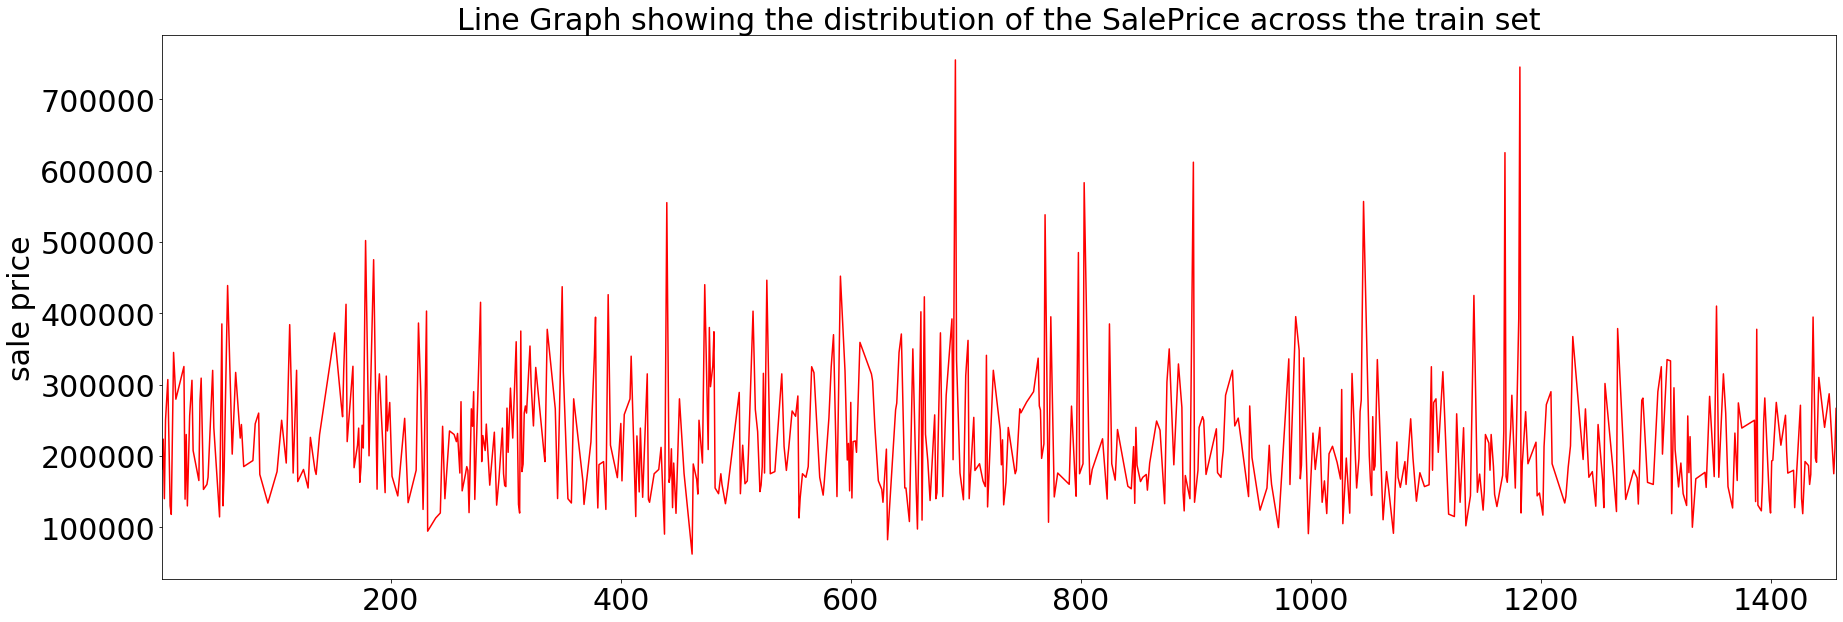

In [17]:
train['SalePrice'].plot(fontsize=30,figsize = (30,10), color ='red')
plt.title('Line Graph showing the distribution of the SalePrice across the train set', fontsize=30)
plt.ylabel('sale price',fontsize = 30)

`The above graph shows that the salePrice is non-linear, therefore, i should consider using non-linear machine learning algorithms for regression`

### - Histogram:

Text(0.5, 1.0, 'An histogram showing the distribution of the SalePrice across the train dataset')

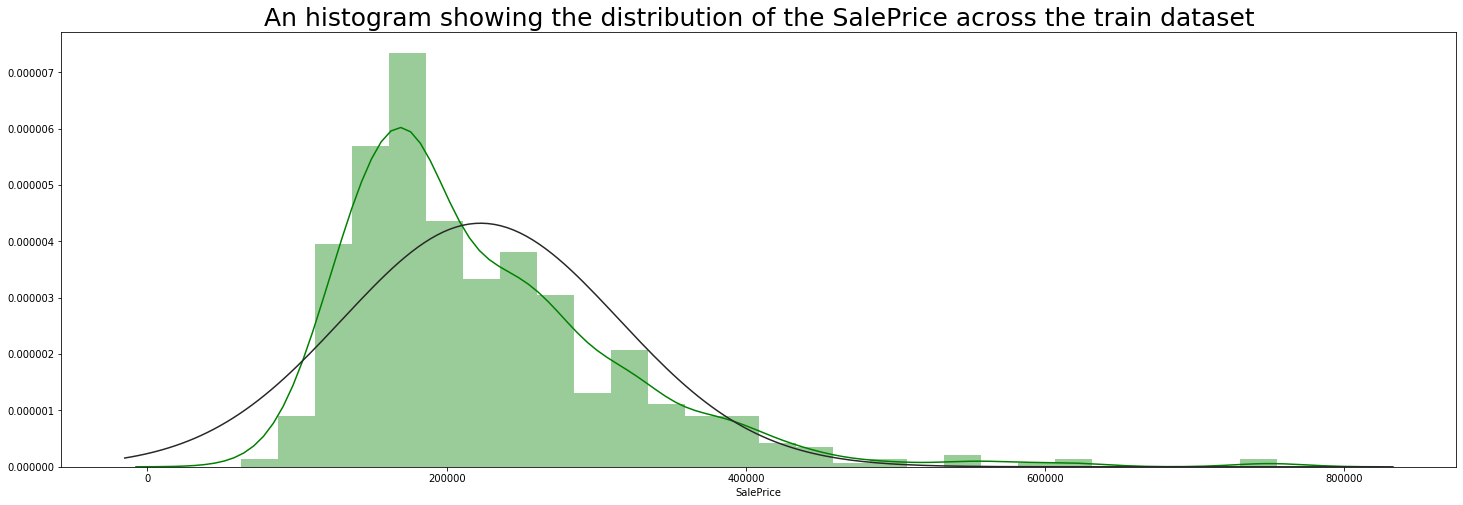

In [18]:
plt.figure(figsize=(25,8))
sns.distplot(train['SalePrice'], fit=norm, color="green")
plt.title('An histogram showing the distribution of the SalePrice across the train dataset', fontsize=25)

`NB, the above plot shows that the saleprice is skewed, hence i might consider removing the out liers`

### 3.7 Visualise correlation between numerical features and the saleprice

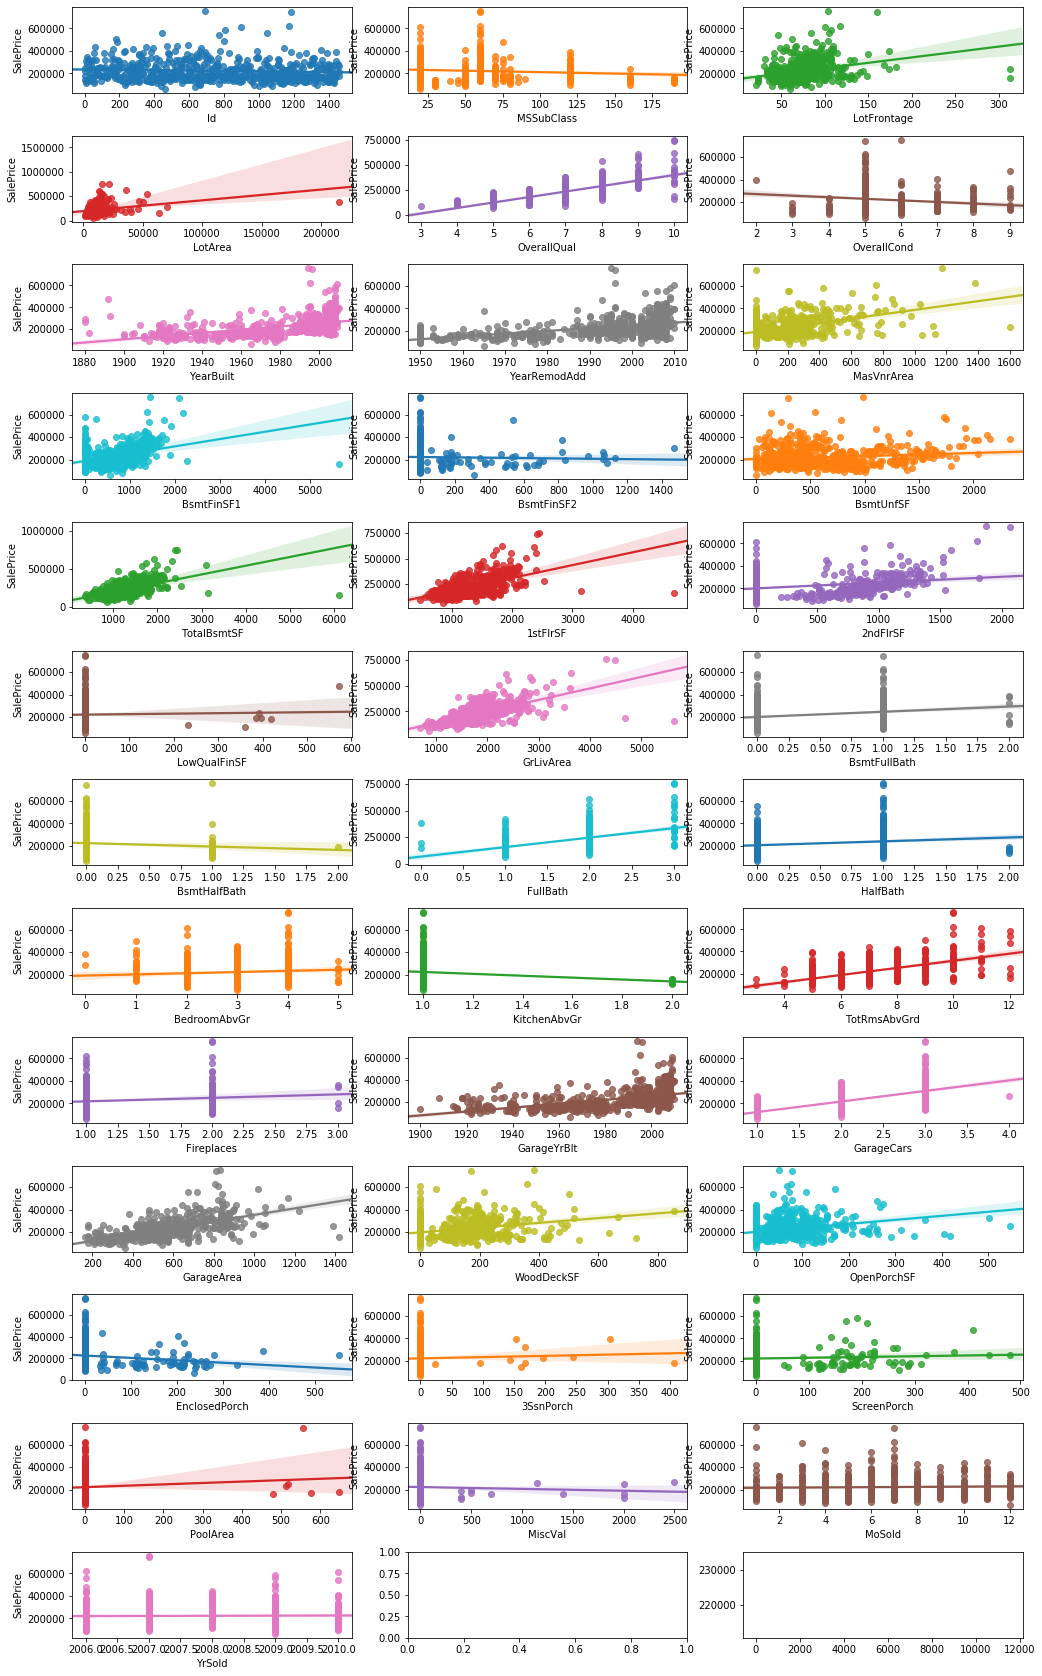

In [56]:
# select out only numerical values
train_numerical = train.select_dtypes(include=[np.number])

fig, axs = plt.subplots(13,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(train_numerical.columns):
    if col != 'SalePrice':
        sns.regplot(train_numerical[col], train_numerical['SalePrice'], ax = axs[ind])
    
plt.show()

### 3.9 Visualizing the distribution of the categorical features in relation to the saleprice

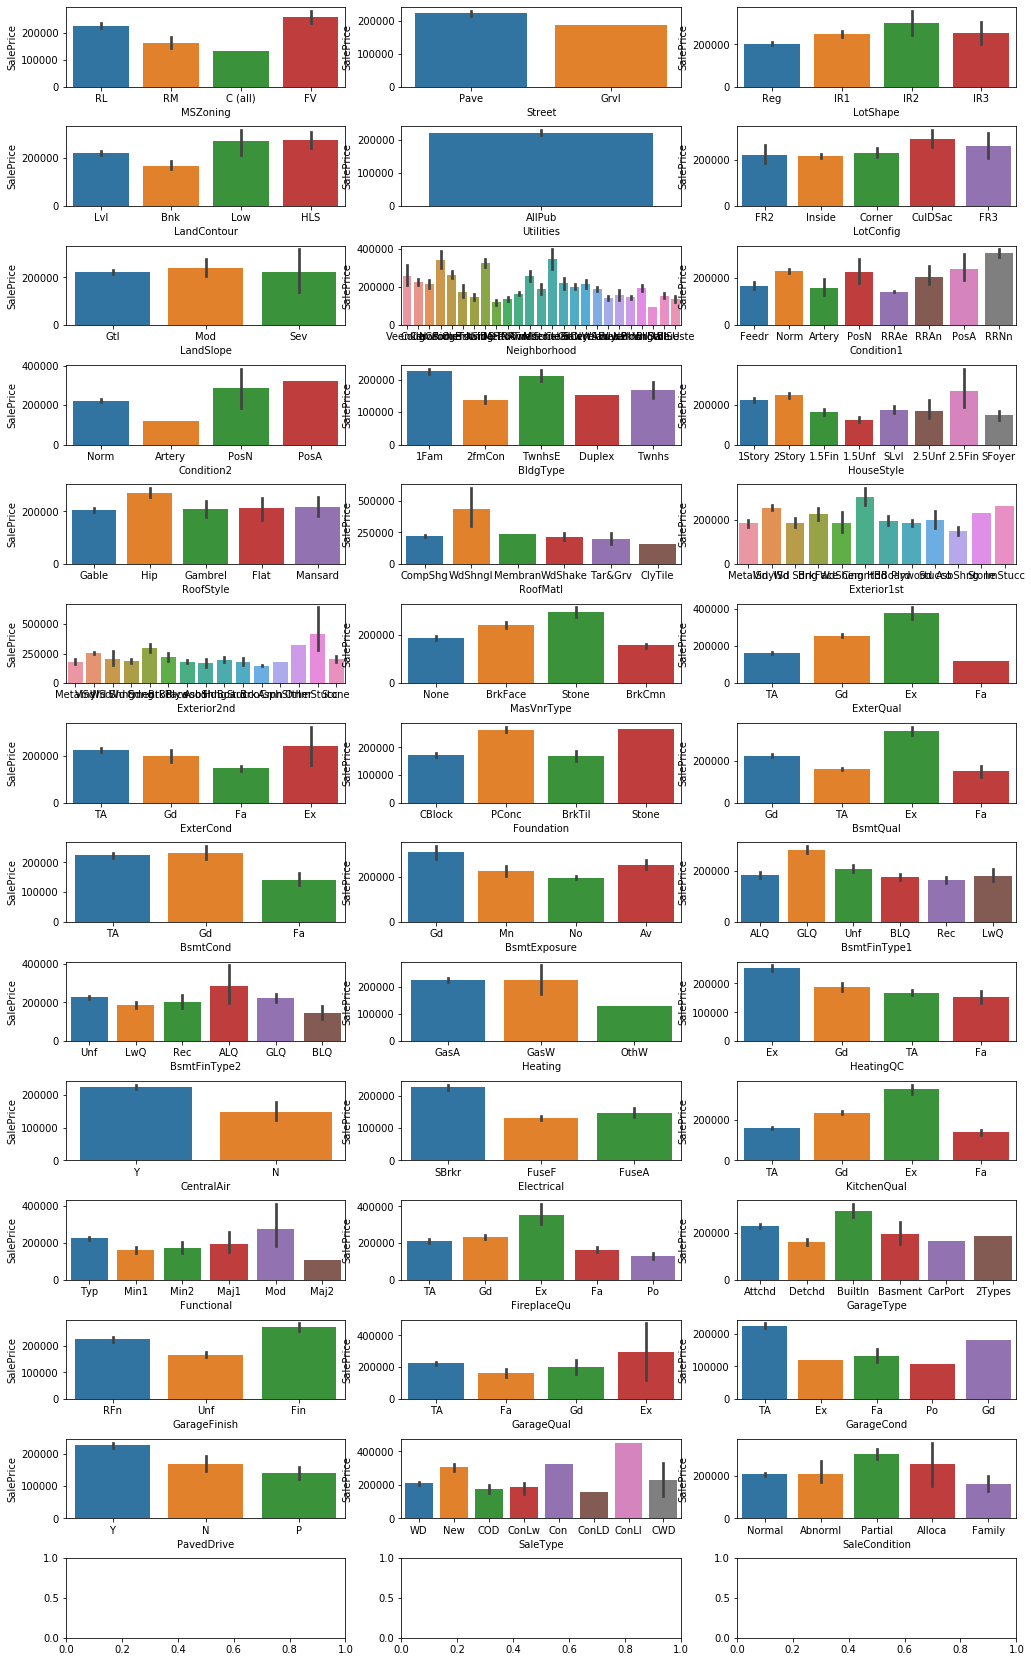

In [58]:
pd.set_option('chained',None)

# select out only columns having categorical data i.e, exclude those with numbers as shown in the command below
train_categorical  = train.select_dtypes(exclude=[np.number])

#add the SalePrice column
train_categorical['SalePrice'] = train['SalePrice']

fig, axs = plt.subplots(14,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.2, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(train_categorical.columns):
    if col != 'SalePrice':
        sns.barplot(train_categorical[col], train_categorical['SalePrice'], ax = axs[ind])

plt.show()

### 3.10 Enconding categorical data

In [60]:
categorical_columns  = train.select_dtypes(exclude=[np.number])

for cols in categorical_columns:
    
    # converting type of columns to 'category'
    train[cols] = train[cols].astype('category')
    # Assigning numerical values 
    train[cols] = train[cols].cat.codes
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,2,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,7,3,181500
2,3,60,2,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,7,3,223500
3,4,70,2,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,7,0,140000
4,5,60,2,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,7,3,250000
6,7,20,2,75.0,10084,1,3,3,0,4,...,0,0,0,0,0,8,2007,7,3,307000


### 3.11. - Correlation between attributes

In [61]:
train.corr(method='pearson')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,-0.030090,0.069888,-0.017709,-0.055275,-0.045160,0.010157,-0.043424,NaN,0.015518,...,0.000092,-0.032634,0.020119,0.066897,0.098007,-0.013871,0.029525,-0.020916,0.006390,-0.074858
MSSubClass,-0.030090,1.000000,0.123130,-0.340014,-0.191226,0.039704,0.066553,-0.003720,NaN,-0.010022,...,0.020328,-0.010460,0.000443,0.007164,-0.030794,-0.009648,-0.021919,0.000762,-0.021722,-0.101487
MSZoning,0.069888,0.123130,1.000000,-0.154471,-0.059701,0.005890,0.077342,-0.119092,NaN,0.037483,...,0.227781,0.007661,0.038504,-0.014419,0.019989,-0.029730,-0.038398,0.032914,-0.083174,-0.193333
LotFrontage,-0.017709,-0.340014,-0.154471,1.000000,0.360432,0.039573,-0.079390,-0.037129,NaN,-0.195812,...,0.055821,0.061821,-0.007634,0.242820,-0.026369,-0.017081,0.015911,-0.010713,-0.011211,0.283097
LotArea,-0.055275,-0.191226,-0.059701,0.360432,1.000000,-0.092277,-0.129860,-0.141961,NaN,-0.085711,...,-0.017653,-0.007294,0.048548,0.102711,-0.006037,0.006199,0.004851,0.018464,0.024489,0.252301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013871,-0.009648,-0.029730,-0.017081,0.006199,0.022045,-0.034312,-0.056589,NaN,0.040499,...,-0.058834,0.006809,0.013857,-0.078687,-0.010126,1.000000,-0.179608,-0.000214,0.116301,0.032827
YrSold,0.029525,-0.021919,-0.038398,0.015911,0.004851,0.022700,0.080255,0.072087,NaN,-0.004079,...,0.007338,0.000474,-0.029074,-0.070109,0.025353,-0.179608,1.000000,-0.005571,-0.063842,0.017793
SaleType,-0.020916,0.000762,0.032914,-0.010713,0.018464,-0.012343,0.057632,-0.026596,NaN,0.052686,...,0.073654,-0.001641,0.039610,0.015529,0.036132,-0.000214,-0.005571,1.000000,0.056994,-0.092387
SaleCondition,0.006390,-0.021722,-0.083174,-0.011211,0.024489,-0.000096,-0.032737,-0.041798,NaN,0.031227,...,-0.189911,0.052505,-0.040601,-0.113578,0.000282,0.116301,-0.063842,0.056994,1.000000,0.199391


### 3.11.1 - Check correlation in regards to the SalePrice

In [62]:
train.corr(method='pearson')['SalePrice']

Id              -0.074858
MSSubClass      -0.101487
MSZoning        -0.193333
LotFrontage      0.283097
LotArea          0.252301
                   ...   
MoSold           0.032827
YrSold           0.017793
SaleType        -0.092387
SaleCondition    0.199391
SalePrice        1.000000
Name: SalePrice, Length: 77, dtype: float64

In [63]:
## Filter out only the positively correlated
positive_corr = train.corr(method = 'pearson')['SalePrice']
positive_corr = pd.DataFrame(positive_corr[positive_corr>0.5]) 
positive_corr

,SalePrice
OverallQual,0.776329
YearRemodAdd,0.519747
TotalBsmtSF,0.574926
1stFlrSF,0.560903
GrLivArea,0.662289
FullBath,0.508674
TotRmsAbvGrd,0.547225
GarageCars,0.667489
GarageArea,0.632144
SalePrice,1.000000


In [64]:
#check the number of selected features
positive_corr.shape

(10, 1)

In [65]:
# show the names of the seleceted features
positive_corr.index

Index(['OverallQual', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [24]:
train1 = train[positive_corr.index]
train1

,OverallQual,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
1,6,1976,1262,1262,1262,2,6,2,460,181500
2,7,2002,920,920,1786,2,6,2,608,223500
3,7,1970,756,961,1717,1,7,3,642,140000
4,8,2000,1145,1145,2198,2,9,3,836,250000
6,8,2005,1686,1694,1694,2,7,2,636,307000
...,...,...,...,...,...,...,...,...,...,...
1447,8,1996,1220,1220,2090,2,8,2,556,240000
1451,8,2009,1573,1578,1578,2,7,3,840,287090
1455,6,2000,953,953,1647,2,7,2,460,175000
1456,6,1988,1542,2073,2073,2,7,2,500,210000


In [25]:
train1.isna().sum()

OverallQual     0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

### Rescalling and Normalizing the Data

In [136]:

from numpy import set_printoptions
from sklearn.preprocessing import normalize,MinMaxScaler

array = train1.values
# separate array into input and output components
X = array[:,0:9]
Y = array[:,9]
# rescaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
t_rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(t_rescaledX[0:5,:])


[[0.429 0.433 0.157 0.185 0.115 0.667 0.333 0.333 0.236]
 [0.571 0.867 0.097 0.104 0.221 0.667 0.333 0.333 0.354]
 [0.571 0.333 0.069 0.114 0.207 0.333 0.444 0.667 0.381]
 [0.714 0.833 0.137 0.157 0.304 0.667 0.667 0.667 0.536]
 [0.714 0.917 0.231 0.288 0.202 0.667 0.444 0.333 0.376]]


### Comparing multiple algorithm performance the train dataset

('KNN', 0.1732500779725088)
('DTR', 0.1998008595577344)
('SG', 0.2136820353125525)
('RFR', 0.16563252005367812)
('REG', 0.21477857478357143)
('BRR', 0.21416095436454452)
('XGB', 0.1658807243914318)


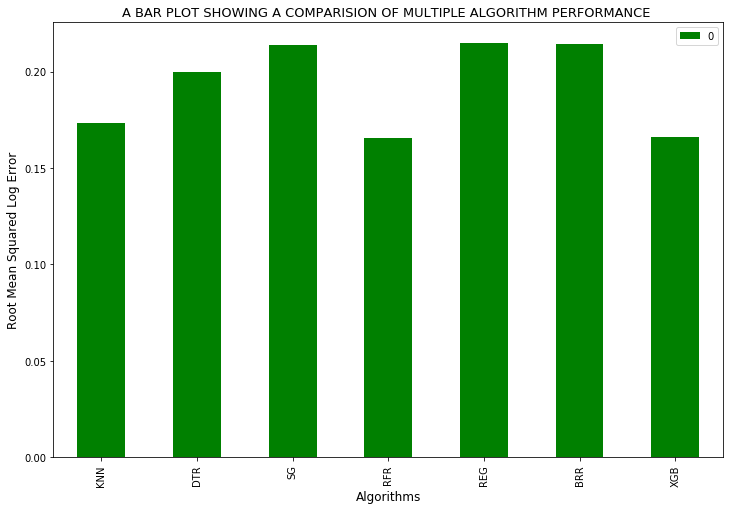

In [146]:
# Cross Validation Regression R^2
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge,RidgeCV,Ridge
from sklearn.ensemble import RandomForestRegressor
import math
from matplotlib import pyplot

array = train1.values
X = t_rescaledX
Y = array[:,9]
# prepare models and add them to a list
models = []
models.append(("KNN", KNeighborsRegressor()))
models.append(("DTR", DecisionTreeRegressor()))
models.append(("SG",SGDRegressor()))
models.append(("RFR",RandomForestRegressor()))
models.append(("REG",RidgeCV()))
models.append(("BRR",BayesianRidge()))
models.append(("XGB", XGBRegressor()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
    #kfold = KFold(n_splits=10, random_state=7)
    #cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    #results.append(cv_results)
    test_size = 0.3
    seed = 7
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    RMSLE = math.sqrt(mean_squared_log_error(y_pred,Y_test))
    results.append(RMSLE)
    names.append(name)
    msg = (name, RMSLE)
    print(msg)

# barplot algorithm comparison
pd.set_option('chained',None)
fig = pd.DataFrame(results, index = names)
fig.plot.bar(figsize=(12,8), color="g")
plt.xlabel('Algorithms', size= 12) 
plt.ylabel('Root Mean Squared Log Error', size =12)
plt.title('A BAR PLOT SHOWING A COMPARISION OF MULTIPLE ALGORITHM PERFORMANCE ', size = 13)
plt.show()


`Note: the smaller the RMSLE, the better, therefore, the above bar graph shows that XGB is the best algorithm`

### Voting Ensemble
- Note; from the step of spot-checking multiple algorithms, i will choose the best 3 algorithms and use them on the voting regressor algorithm. that is XGB, KNN and RFR

In [177]:
## Voting ensemble

array = train1.values
X = t_rescaledX
Y = array[:,9]

test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

# create the sub models
estimators = []
model1 = KNeighborsRegressor().fit(X_train, Y_train)
estimators.append(('knn', model1))

model2 = DecisionTreeRegressor().fit(X_train, Y_train)
estimators.append(('cart', model2))

model3 = XGBRegressor().fit(X_train, Y_train)
estimators.append(('xgb', model3))

model4 = RandomForestRegressor().fit(X_train, Y_train)
estimators.append(('rfR', model4))

# create the ensemble model
ensemble = VotingRegressor(estimators)
y_pred =ensemble.fit(X_train,Y_train).predict(X_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,Y_test))
print(RMSLE)

0.16022826839006657


### Test dataset preprocessing

In [28]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [29]:
# keep columns with atleast 690 missing values. that means it will only keep columns upto Fireplacequ 
#test = pd.DataFrame(test.dropna(axis='columns', thresh=690))
#test

In [30]:
# Drop all rows with null values within the testdata set
#test = test.dropna(axis = "index")
#test

In [31]:
positive_test_corr = positive_corr.head(9)
positive_test_corr.index

Index(['OverallQual', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea'],
      dtype='object')

In [32]:
test1 = test[positive_test_corr.index]
test1

,OverallQual,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,5,1961,882.0,896,896,1,5,1.0,730.0
1,6,1958,1329.0,1329,1329,1,6,1.0,312.0
2,5,1998,928.0,928,1629,2,6,2.0,482.0
3,6,1998,926.0,926,1604,2,7,2.0,470.0
4,8,1992,1280.0,1280,1280,2,5,2.0,506.0
...,...,...,...,...,...,...,...,...,...
1454,4,1970,546.0,546,1092,1,5,0.0,0.0
1455,4,1970,546.0,546,1092,1,6,1.0,286.0
1456,5,1996,1224.0,1224,1224,1,7,2.0,576.0
1457,5,1992,912.0,970,970,1,6,0.0,0.0


In [33]:
test1.isna().sum()

OverallQual     0
YearRemodAdd    0
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      1
GarageArea      1
dtype: int64

In [40]:
test1 = test1.fillna(test1.mean())
test1.isna().sum()

OverallQual     0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
dtype: int64

In [184]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

# convert the dataframe test1 into an array
array1 = test1.values

scaler = MinMaxScaler(feature_range=(0, 1))
test_rescaledX = scaler.fit_transform(array1)
# summarize transformed data
set_printoptions(precision=3)
print(test_rescaledX[0:5,:])

[[0.444 0.183 0.173 0.104 0.104 0.25  0.167 0.2   0.491]
 [0.556 0.133 0.261 0.197 0.197 0.25  0.25  0.2   0.21 ]
 [0.444 0.8   0.182 0.111 0.261 0.5   0.25  0.4   0.324]
 [0.556 0.8   0.182 0.111 0.255 0.5   0.333 0.4   0.316]
 [0.778 0.7   0.251 0.186 0.186 0.5   0.167 0.4   0.34 ]]


### Finalizing the model

In [188]:
## Voting ensemble

array = train1.values
X = t_rescaledX
Y = array[:,9]

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed)

# create the sub models
#estimators = []
#model1 = KNeighborsRegressor().fit(X_train, Y_train)
#estimators.append(('knn', model1))

#model2 = DecisionTreeRegressor().fit(X_train, Y_train)
#estimators.append(('cart', model2))

model3 = XGBRegressor().fit(X_train, Y_train)
#estimators.append(('xgb', model3))

#model4 = RandomForestRegressor().fit(X_train, Y_train)
#estimators.append(('rfR', model4))

# create the ensemble model
#ensemble = VotingRegressor(estimators)
y_pred =model3.fit(X_train,Y_train).predict(X_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,Y_test))
print(RMSLE)

# fitting the model

model3.fit(X,Y)

# Using the model to predict the saleprice of the test dataset

saleprice= model3.predict(test_rescaledX)

my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': saleprice})

#you could use any filename. We choose submission here
my_submission.to_csv('prices.csv', index=False)

0.17124565032793615
